# CNN 

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img

### Neural Networks 
- With changed zoom, shear and brightness

Building cnn model

In [5]:
cnn_base = Sequential()

In [6]:
#Convolution
cnn_base.add(Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))

In [7]:
# pooling 
cnn_base.add(MaxPooling2D(pool_size = (2, 2)))

In [9]:
#2nd Convulation 
cnn_base.add(Conv2D(32, (3, 3), activation="relu"))

In [11]:
# 2nd pooling layer 
cnn_base.add(MaxPooling2D(pool_size = (2, 2)))

In [13]:
# flatten 
cnn_base.add(Flatten())

In [14]:
# connect layers 
cnn_base.add(Dense(activation = 'relu', units = 128))
cnn_base.add(Dense(activation = 'sigmoid', units = 1))

In [15]:
#compile the network 
cnn_base.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
# augments image by iteratting through image 
train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
#load data set 
training_set = train_datagen.flow_from_directory(r'C:\Users\tonym\Documents\Flatiron\phase_4\project_data\train', 
                                                target_size = (150,150),
                                                batch_size = 16
                                                )
validation_gen = train_datagen.flow_from_directory(r'C:\Users\tonym\Documents\Flatiron\phase_4\project_data\val', 
                                                target_size = (150,150),
                                                batch_size = 16
                                                )
test_set = train_datagen.flow_from_directory(r'C:\Users\tonym\Documents\Flatiron\phase_4\project_data\test', 
                                                target_size = (150,150),
                                                batch_size = 16
                                                )


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [14]:
model2 = keras.Sequential(
    [
        keras.Input(shape= (150,150,3)), 
        layers.Flatten(), 
        layers.Dense(64, activation="relu"),
        layers.Dense(2, activation="sigmoid"),
         ])
model2.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4320064   
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 130       
Total params: 4,320,194
Trainable params: 4,320,194
Non-trainable params: 0
_________________________________________________________________


In [15]:
# compile model 
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
# fit the model 
# Fit our model (save output to a history variable)
brightmodel = model2.fit_generator(training_set, 
                    steps_per_epoch =52 ,                     
                    epochs=10 , 
                    validation_data = validation_gen,
                    validation_steps = 1)

Epoch 1/10
52/52 [==============================] - 11s 219ms/step - loss: 3.5817 - accuracy: 0.7356 - val_loss: 5.4538 - val_accuracy: 0.6250
Epoch 2/10
52/52 [==============================] - 11s 213ms/step - loss: 1.3768 - accuracy: 0.8089 - val_loss: 5.0804 - val_accuracy: 0.5625
Epoch 3/10
52/52 [==============================] - 11s 204ms/step - loss: 1.6759 - accuracy: 0.8281 - val_loss: 5.9976 - val_accuracy: 0.5625
Epoch 4/10
52/52 [==============================] - 11s 213ms/step - loss: 0.8371 - accuracy: 0.8377 - val_loss: 1.9720 - val_accuracy: 0.7500
Epoch 5/10
52/52 [==============================] - 11s 213ms/step - loss: 1.1682 - accuracy: 0.7993 - val_loss: 1.7883 - val_accuracy: 0.7500
Epoch 6/10
52/52 [==============================] - 11s 206ms/step - loss: 2.3576 - accuracy: 0.8005 - val_loss: 0.9641 - val_accuracy: 0.6250
Epoch 7/10
52/52 [==============================] - 11s 211ms/step - loss: 0.5898 - accuracy: 0.8101 - val_loss: 2.9710 - val_accuracy: 0.5625

In [17]:
# checking accuracy 
test_acc_bright = model2.evaluate(test_set, steps = 1)


1/1 [==============================] - 0s 996us/step - loss: 0.5011 - accuracy: 0.6875


In [18]:
#accuracy 
print('test acc is:', test_acc_bright[1] * 100, '%')

test acc is: 68.75 %


#### Baseline confusion matrix 

In [28]:
Y_pred = model.predict_generator(test_set,1)
y_pred = np.argmax(Y_pred, axis = 1)

In [29]:
max(y_pred)

1

### Accuracy Baseline Plot 

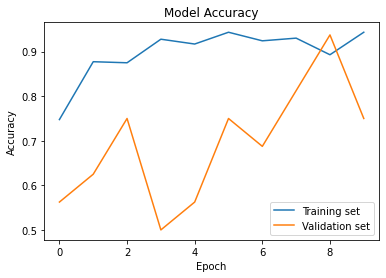

In [35]:
plt.plot(baseline.history['accuracy'])
plt.plot(baseline.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='lower right')
plt.show()

### Loss Baseline Plot 

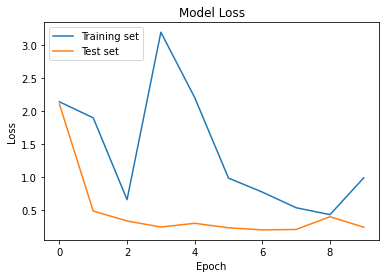

In [36]:
plt.plot(baseline.history['val_loss'])
plt.plot(baseline.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()